## ポートフォリオ構築時の銘柄数の調整
1. S&P500を構成する全銘柄（10年間指数に組み入れられている459銘柄）を対象に最適化を実施
2. 1の結果から配分比率が上位の銘柄を指定数だけ抽出し再度最適化を実施（上位10銘柄～100銘柄で実施）

![チャート](./sp500/portfolio100.png)

![チャート](./sp500/port10_459.png)

![チャート](./sp500/num_te.png)

In [30]:
import numpy as np
import scipy.stats as st
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
from matplotlib import dates as mdates

In [36]:
Benchmark = pd.read_csv('sp500.csv')
Benchmark = Benchmark.set_index('Date')
Benchmark = Benchmark.drop(['Open', 'High','Low','Adj Close','Volume'], axis=1)
port = pd.read_csv('./sp500/portfolio459.csv')
port = port.set_index('Date')

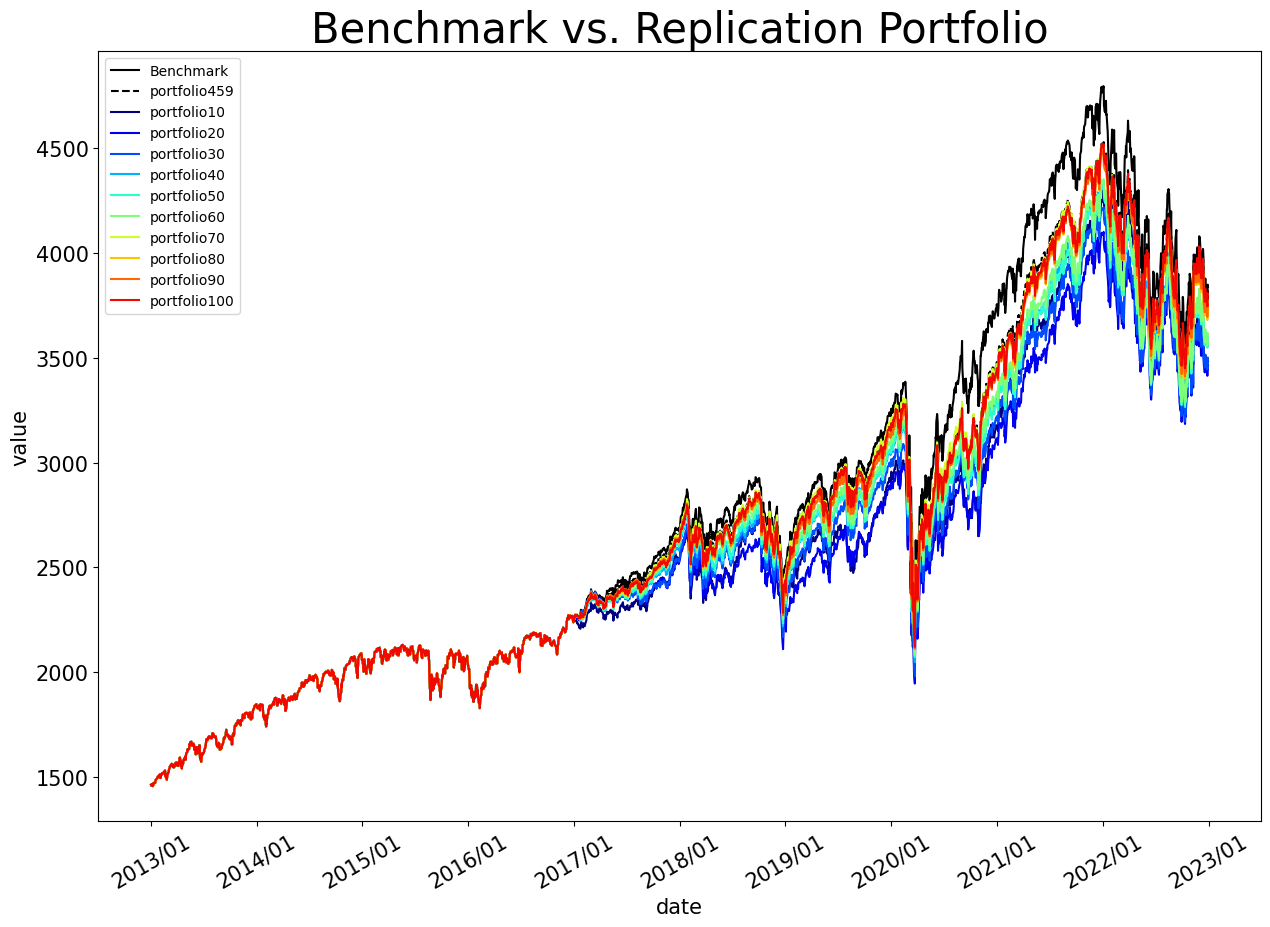

In [50]:



fig = plt.figure(figsize=(15, 10))
# spec = fig.add_gridspec(ncols=1, nrows=4,  height_ratios=heights)
#spec = fig.add_gridspec(ncols=1, nrows=5)
ax = fig.add_subplot(1,1,1)

#ベンチマーク
ax.plot(pd.to_datetime(Benchmark.index),Benchmark['Close'],c='k')
#フル460銘柄
ax.plot(pd.to_datetime(port.index),port['Close'],c='k',linestyle="--")
#一部銘柄
leg = ['Benchmark','portfolio459']
for i in range(10):
    num = (i+1)*10
    file = './sp500/portfolio'+str(num)+'.csv'
    d = pd.read_csv(file, index_col=0)
    ax.plot(pd.to_datetime(d.index),d['Close'], color=cm.jet(i/10),linestyle="-")
    leg.append('portfolio'+str(num))


ax.legend(labels=leg,fontsize=10)
ax.set_xlabel('date', size=15)
ax.set_ylabel('value', size=15)
ax.set_title('Benchmark vs. Replication Portfolio', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=30)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m'))

fig.savefig('./sp500/port10_459.png')

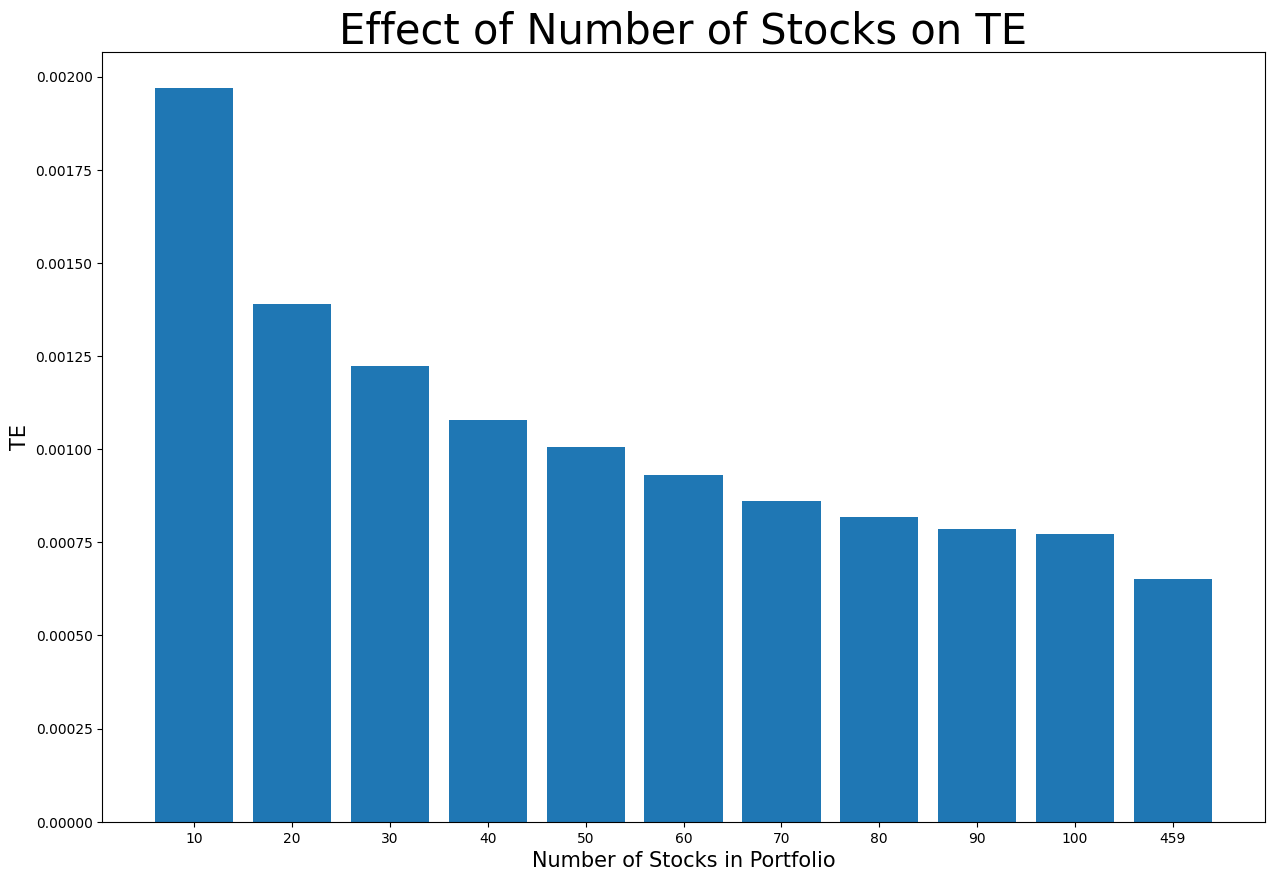

In [51]:
te = [
    0.001968314357943035
    ,0.0013903839746536861
    ,0.0012220156038180718
    ,0.0010786594359574742
    ,0.0010045271327733807
    ,0.0009309758908181975
    ,0.0008619522243753508
    ,0.0008174664777828022
    ,0.0007851880295214886
    ,0.0007725952612138709
    ,0.0006523185727574377
]

snum = [10,20,30,40,50,60,70,80,90,100,459]

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
ax.bar(range(11),te, tick_label=snum)
# ax.legend(labels=snum,fontsize=10)
ax.set_xlabel('Number of Stocks in Portfolio', size=15)
ax.set_ylabel('TE', size=15)
ax.set_title('Effect of Number of Stocks on TE', fontsize=30)

fig.savefig('./sp500/num_te.png')